### Importing modules

In [1]:
## Run this section

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import census, beds, data upto 21st March

In [2]:
census = pd.read_csv("population_india_census2011.csv")
census.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Sex Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [3]:
beds = pd.read_csv("HospitalBedsIndia.csv")
beds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [4]:
def date_format(x):
    x=x.split('/')
    x[0],x[2] = '2020',x[0]
    return '-'.join(x)

In [5]:
covid = pd.read_csv("covid_19_india.csv")
covid=covid.drop(['Sno'], axis=1)
covid['Date'] = covid['Date'].apply(date_format)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
Date                        270 non-null object
State/UnionTerritory        270 non-null object
ConfirmedIndianNational     270 non-null int64
ConfirmedForeignNational    270 non-null int64
Cured                       270 non-null int64
Deaths                      270 non-null int64
dtypes: int64(4), object(2)
memory usage: 12.7+ KB


In [6]:
covid.to_csv("covid.csv",index=False)

## Start Running all the cells from here once daily

#### Importing from Ministry of Health

In [124]:
## Start running

latest = pd.read_html("https://www.mohfw.gov.in/")[1]
latest = latest.drop(['S. No.'], axis=1)

In [125]:
latest.columns = ['State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths']

In [126]:
latest['Date'] = str(datetime.date.today())

In [127]:
latest = latest[:-1]

In [80]:
latest

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Date
0,Andhra Pradesh,5,0,0,0,2020-03-23
1,Bihar,2,0,0,1,2020-03-23
2,Chhattisgarh,1,0,0,0,2020-03-23
3,Delhi,28,1,5,1,2020-03-23
4,Gujarat,18,0,0,1,2020-03-23
5,Haryana,7,14,0,0,2020-03-23
6,Himachal Pradesh,2,0,0,0,2020-03-23
7,Karnataka,26,0,2,1,2020-03-23
8,Kerala,60,7,3,0,2020-03-23
9,Madhya Pradesh,6,0,0,0,2020-03-23


### Merging latest data and previous data

In [128]:
old_covid = pd.read_csv("covid.csv")


In [129]:
## Deleting today's record to avoid overwriting
old_covid = old_covid[old_covid['Date'] != str(datetime.date.today())]

In [130]:
## Merge
covid = pd.concat([old_covid, latest], ignore_index=True)

## Updating csv
covid.to_csv("covid.csv", index=False)

## Work with updated covid DF.
covid.info()

## Stop Running

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 6 columns):
ConfirmedForeignNational    316 non-null object
ConfirmedIndianNational     316 non-null object
Cured                       316 non-null int64
Date                        316 non-null object
Deaths                      316 non-null int64
State/UnionTerritory        316 non-null object
dtypes: int64(2), object(4)
memory usage: 14.9+ KB


C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [131]:
# Converting to datetime
covid['Date'] = pd.to_datetime(covid['Date'])
#covid['Date']

## Stop Running all the cells here

### Formatting Beds

In [15]:
## Do not run
beds = beds.drop(['Sno','Unnamed: 12','Unnamed: 13'], axis=1)
beds.columns = ['State/UnionTerritory', 'PrimaryHealthCenters',
       'CommunityHealthCenters', 'SubDistrictHospitals',
       'DistrictHospitals', 'TotalPublicHealthFacilities',
       'NumPublicBeds', 'RuralHospitals', 'NumRuralBeds',
       'UrbanHospitals', 'NumUrbanBeds']

In [16]:
beds = beds.fillna(0)
beds = beds[:-1]
beds

,State/UnionTerritory,PrimaryHealthCenters,CommunityHealthCenters,SubDistrictHospitals,DistrictHospitals,TotalPublicHealthFacilities,NumPublicBeds,RuralHospitals,NumRuralBeds,UrbanHospitals,NumUrbanBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27.0,575.0,3.0,500.0
1,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0
2,Arunachal Pradesh,122,62,0,15,199,2320,208.0,2136.0,10.0,268.0
3,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0
4,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0
5,Chandigarh,40,2,1,4,47,3756,0.0,0.0,4.0,778.0
6,Chhattisgarh,813,166,12,32,1023,14354,169.0,5070.0,45.0,4342.0
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10.0,273.0,1.0,316.0
8,Daman & Diu,4,2,0,2,8,298,5.0,240.0,0.0,0.0
9,Delhi,534,25,9,47,615,20572,0.0,0.0,109.0,24383.0


In [17]:
beds['RuralHospitals'] = beds['RuralHospitals'].apply(int)
beds['NumRuralBeds'] = beds['NumRuralBeds'].apply(int)
beds['UrbanHospitals'] = beds['UrbanHospitals'].apply(int)
beds['NumUrbanBeds'] = beds['NumUrbanBeds'].apply(int)

beds

,State/UnionTerritory,PrimaryHealthCenters,CommunityHealthCenters,SubDistrictHospitals,DistrictHospitals,TotalPublicHealthFacilities,NumPublicBeds,RuralHospitals,NumRuralBeds,UrbanHospitals,NumUrbanBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0
9,Delhi,534,25,9,47,615,20572,0,0,109,24383


In [18]:
beds.to_csv('beds.csv', index=False)

Call **beds.csv** as *beds* 

In [19]:
## Start running
beds = pd.read_csv('beds.csv')
beds

,State/UnionTerritory,PrimaryHealthCenters,CommunityHealthCenters,SubDistrictHospitals,DistrictHospitals,TotalPublicHealthFacilities,NumPublicBeds,RuralHospitals,NumRuralBeds,UrbanHospitals,NumUrbanBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0
9,Delhi,534,25,9,47,615,20572,0,0,109,24383


### Census Formatting

In [20]:
census = census.drop(['Sno'],axis=1)

In [21]:
census.columns = ['State/UnionTerritory', 'Population', 'Rural',
       'Urban', 'Area-sqkm', 'Density-/sqkm', 'SexRatio']

In [22]:
census['Area-sqkm'] = census['Area-sqkm'].apply(lambda x: int(''.join(x.split()[0].split(','))))

In [23]:
census['Density-/sqkm'] = census['Density-/sqkm'].apply(lambda x: float(''.join(x.split('/')[0].split(','))))

In [24]:
census 

,State/UnionTerritory,Population,Rural,Urban,Area-sqkm,Density-/sqkm,SexRatio
0,Uttar Pradesh,199812341,155317278,44495063,240928,828.0,912
1,Maharashtra,112374333,61556074,50818259,307713,365.0,929
2,Bihar,104099452,92341436,11758016,94163,1102.0,918
3,West Bengal,91276115,62183113,29093002,88752,1029.0,953
4,Madhya Pradesh,72626809,52557404,20069405,308245,236.0,931
5,Tamil Nadu,72147030,37229590,34917440,130058,555.0,996
6,Rajasthan,68548437,51500352,17048085,342239,201.0,928
7,Karnataka,61095297,37469335,23625962,191791,319.0,973
8,Gujarat,60439692,34694609,25745083,196024,308.0,919
9,Andhra Pradesh,49577103,34966693,14610410,162968,303.0,993


In [25]:
census.to_csv("census.csv", index=False)

Call **census.csv** as census

In [26]:
# Run this
census = pd.read_csv("census.csv")
census.head()

,State/UnionTerritory,Population,Rural,Urban,Area-sqkm,Density-/sqkm,SexRatio
0,Uttar Pradesh,199812341,155317278,44495063,240928,828.0,912
1,Maharashtra,112374333,61556074,50818259,307713,365.0,929
2,Bihar,104099452,92341436,11758016,94163,1102.0,918
3,West Bengal,91276115,62183113,29093002,88752,1029.0,953
4,Madhya Pradesh,72626809,52557404,20069405,308245,236.0,931


=====================================================================================

## Study of COVID 19 IN

In [134]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 6 columns):
ConfirmedForeignNational    316 non-null object
ConfirmedIndianNational     316 non-null object
Cured                       316 non-null int64
Date                        316 non-null datetime64[ns]
Deaths                      316 non-null int64
State/UnionTerritory        316 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 14.9+ KB


In [135]:
covid['ConfirmedForeignNational'] = covid['ConfirmedForeignNational'].apply(int)
covid['ConfirmedIndianNational'] = covid['ConfirmedIndianNational'].apply(int)

In [136]:
covid['Total Active'] = covid['ConfirmedForeignNational'] + covid['ConfirmedIndianNational'] - covid['Cured']
covid['Total'] = covid['ConfirmedForeignNational'] + covid['ConfirmedIndianNational'] 

In [137]:
india = covid.groupby('Date').sum()
india

,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total Active,Total
Date,,,,,,
2020-01-30,0,1,0,0,1,1
2020-01-31,0,1,0,0,1,1
2020-02-01,0,2,0,0,2,2
2020-02-02,0,3,0,0,3,3
2020-02-03,0,3,0,0,3,3
2020-02-04,0,3,0,0,3,3
2020-02-05,0,3,0,0,3,3
2020-02-06,0,3,0,0,3,3
2020-02-07,0,3,0,0,3,3


In [140]:
## importing plot.ly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

### EDA India

In [172]:
india[['Total','ConfirmedIndianNational','ConfirmedForeignNational']].iplot(
    title='CUMULATIVE COUNT',
    colors={'Total':'black','ConfirmedIndianNational':'orange',
            'ConfirmedForeignNational':'blue'}, width=2.5,
    xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [170]:
india[['Total Active','Cured','Deaths']].iplot(title='[ACTIVE CASES]\nHOSPITALIZED vs CURED vs DEATH',
                                      colors={'Total Active':'blue','Cured':'green','Deaths':'red'}, width=2.5
                                              ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

**80% of the affected people will be safe** if heathcare system doesn't breakdown

In [173]:
india['Safe-Zone'] = india['Total']*0.8

In [201]:
india[['Total','Safe-Zone']].iplot(title='CUMULATIVE COUNT',
                    colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [184]:
init = 0
ls = []
for x in india['Total']:
    ls.append(x-init)
    init=x
print(ls)
india['Rise'] = ls

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 22, 2, 1, 3, 5, 7, 12, 2, 14, 7, 3, 26, 4, 23, 14, 22, 50, 60, 77, 30]


In [198]:
india['Rise'].iplot(kind='bar', sharing='public', title='DAILY RISE IN CASES', colors={'Rise':'indigo'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

#### Statewise statistics

In [224]:
states = latest.copy()
states.drop(['Date'], axis=1, inplace=True)
states['ConfirmedForeignNational']=states['ConfirmedForeignNational'].apply(int)
states['ConfirmedIndianNational']=states['ConfirmedIndianNational'].apply(int)
states['Total'] = states['ConfirmedForeignNational']+states['ConfirmedIndianNational']
states.set_index('State/UnionTerritory', inplace=True)
states

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total
State/UnionTerritory,,,,,
Andhra Pradesh,5,0,0,0,5
Bihar,2,0,0,1,2
Chhattisgarh,1,0,0,0,1
Delhi,28,1,5,1,29
Gujarat,18,0,0,1,18
Haryana,7,14,0,0,21
Himachal Pradesh,2,0,0,0,2
Karnataka,26,0,2,1,26
Kerala,60,7,3,0,67


In [263]:
states.iplot(kind='bar')

#### Working on map of India

In [277]:
# Because we're making some modifications according to geopandas
map_state = states.copy()

In [278]:
map_state.index = ['Andhra Pradesh', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Chandigarh', 'Jammu & Kashmir', 'Ladakh',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [279]:
## Merging Ladakh with J&K
map_state.loc['Jammu & Kashmir'] = map_state.loc['Jammu & Kashmir']+map_state.loc['Ladakh']

In [280]:
import geopandas as gpd
import descartes

In [281]:
fp = "Igismap/Indian_States.shp"  #Download this file available on the internet.
map_df = gpd.read_file(fp)

In [282]:
map_df=map_df.set_index('st_nm')
map_df.index # To tally the names

Index(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Odisha', 'Andhra Pradesh'],
      dtype='object', name='st_nm')

In [283]:
merged = map_df.join(map_state) #with index as statename
merged['Total'].fillna(0, inplace=True)
merged

,geometry,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total
st_nm,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN,NaN,0.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN,NaN,NaN,NaN,0.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN,NaN,NaN,NaN,0.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2.0,0.0,0.0,1.0,2.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",5.0,0.0,0.0,0.0,5.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",1.0,0.0,0.0,0.0,1.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN,NaN,NaN,NaN,0.0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN,NaN,NaN,0.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",NaN,NaN,NaN,NaN,0.0


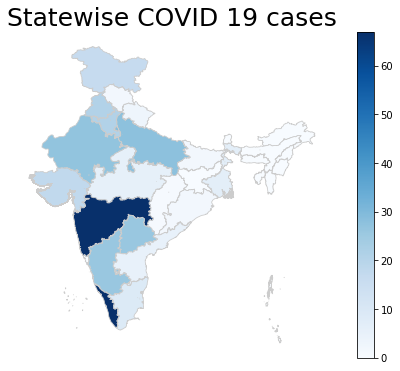

In [290]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Statewise COVID 19 cases', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.plot(column='Total', cmap='Blues', 
            linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [289]:
fig.savefig("State_wise.png", dpi=1000)